In [1]:
import pandas as pd

file_path = "C:/Users/Mutlu/Downloads/Health_insurance (2).csv"
df = pd.read_csv(file_path)

df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [2]:
# Eksik veri kontrolü
missing_values = df.isnull().sum()

summary_stats = df.describe()

missing_values, summary_stats


(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
                age          bmi     children       charges
 count  1338.000000  1338.000000  1338.000000   1338.000000
 mean     39.207025    30.663397     1.094918  13270.422265
 std      14.049960     6.098187     1.205493  12110.011237
 min      18.000000    15.960000     0.000000   1121.873900
 25%      27.000000    26.296250     0.000000   4740.287150
 50%      39.000000    30.400000     1.000000   9382.033000
 75%      51.000000    34.693750     2.000000  16639.912515
 max      64.000000    53.130000     5.000000  63770.428010)

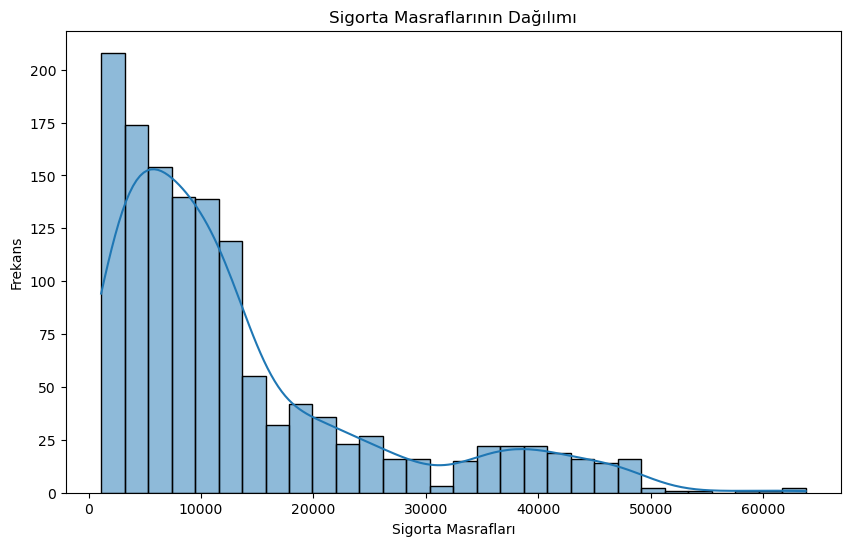

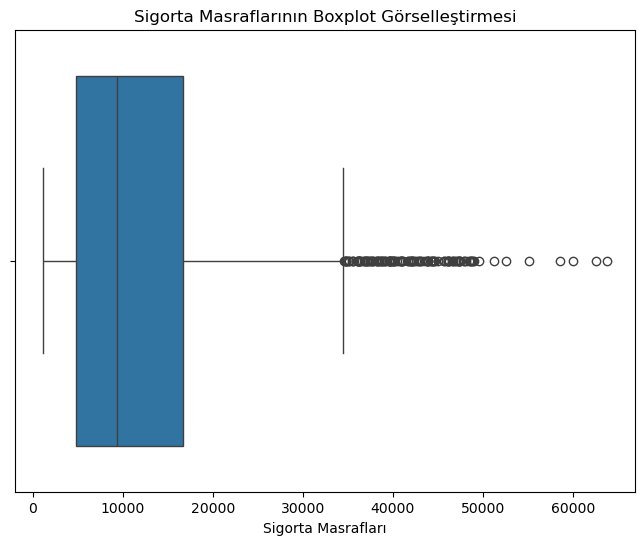

(1.5141797118745743, 1.595821363956751)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Sigorta masraflarının dağılımını inceleme
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Sigorta Masraflarının Dağılımı')
plt.xlabel('Sigorta Masrafları')
plt.ylabel('Frekans')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df['charges'])
plt.title('Sigorta Masraflarının Boxplot Görselleştirmesi')
plt.xlabel('Sigorta Masrafları')
plt.show()

# Çarpıklık ve basıklık hesaplama
charges_skewness = skew(df['charges'])
charges_kurtosis = kurtosis(df['charges'])

charges_skewness, charges_kurtosis


In [4]:
# Kategorik değişkenlerin benzersiz değerlerini inceleyelim
categorical_columns = ['sex', 'smoker', 'region']
unique_values = {col: df[col].unique() for col in categorical_columns}

# Kategorik değişkenlerin dağılımı
categorical_counts = {col: df[col].value_counts() for col in categorical_columns}

unique_values, categorical_counts


({'sex': array(['female', 'male'], dtype=object),
  'smoker': array(['yes', 'no'], dtype=object),
  'region': array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)},
 {'sex': sex
  male      676
  female    662
  Name: count, dtype: int64,
  'smoker': smoker
  no     1064
  yes     274
  Name: count, dtype: int64,
  'region': region
  southeast    364
  southwest    325
  northwest    325
  northeast    324
  Name: count, dtype: int64})

In [5]:
# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [6]:
# Kategorik değişkenleri one-hot encoding ile sayısala çevirme
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Boolean değişkenleri (True/False) -> 0 ve 1'e çevirme
df_encoded = df_encoded.astype(int)

print(df_encoded.dtypes)

age                 int32
bmi                 int32
children            int32
charges             int32
sex_male            int32
smoker_yes          int32
region_northwest    int32
region_southeast    int32
region_southwest    int32
dtype: object


In [7]:
import statsmodels.api as sm

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = df_encoded.drop(columns=['charges'])  # Bağımsız değişkenler
y = df_encoded['charges']  # Hedef değişken

# Sabit ekleme (intercept)
X = sm.add_constant(X)

# GLM modeli: Gamma dağılımı + Log link fonksiyonu
glm_log = sm.GLM(y, X, family=sm.families.Gamma(link=sm.families.links.log())).fit()

print(glm_log.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                charges   No. Observations:                 1338
Model:                            GLM   Df Residuals:                     1329
Model Family:                   Gamma   Df Model:                            8
Link Function:                    log   Scale:                         0.46667
Method:                          IRLS   Log-Likelihood:                -13307.
Date:                Tue, 11 Mar 2025   Deviance:                       337.64
Time:                        01:11:25   Pearson chi2:                     620.
No. Iterations:                    18   Pseudo R-squ. (CS):             0.6836
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.3904      0.110  

D:\anaconda3\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


 Modelin Genel Başarımı
Pseudo R-Squared (Cragg & Uhler's R²) = 0.6836 → Model sigorta ücretlerindeki değişimin %68.36'sını açıklıyor.
Deviance = 337.64 ve Pearson chi2 = 620 → Modelin veriyle uyumunu gösterir.

In [8]:
print(X.columns)  # Modelin beklediği değişkenler

Index(['const', 'age', 'bmi', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [9]:
yeni_veri = pd.DataFrame({
    'const': [1],  # Sabit terim (Model 'const' bekliyor)
    'age': [40],
    'bmi': [30.5],
    'children': [2],
    'sex_male': [1],  # Erkekse 1, kadınsa 0
    'smoker_yes': [1],  # Sigara içiyorsa 1, içmiyorsa 0
    'region_northwest': [0],  
    'region_southeast': [1],  
    'region_southwest': [0]  
})

tahmini_masraf = glm_log.predict(yeni_veri)

print("Tahmini Sigorta Masrafı:", tahmini_masraf.values[0])


Tahmini Sigorta Masrafı: 34177.31924651778


In [10]:
import statsmodels.formula.api as smf

# Sigara değişkenini binary hale getirme
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})

# Lojistik regresyon modeli
formula_glm = "smoker ~ age + bmi + children"
glm_model = smf.logit(formula=formula_glm, data=df).fit()
print(glm_model.summary())


Optimization terminated successfully.
         Current function value: 0.506589
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                 1338
Model:                          Logit   Df Residuals:                     1334
Method:                           MLE   Df Model:                            3
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:               0.0007362
Time:                        01:11:25   Log-Likelihood:                -677.82
converged:                       True   LL-Null:                       -678.32
Covariance Type:            nonrobust   LLR p-value:                    0.8016
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2771      0.382     -3.343      0.001      -2.026      -0.528
age           -0.0046      0.

Modelin amacı:
Sigara kullanımı (smoker) bağımlı değişken olarak alınarak, yaş (age), BMI (bmi) ve çocuk sayısı (children) bağımsız değişkenler üzerinden tahmin edilmeye çalışıldı.

Bağımsız Değişkenler:
Modelin temel tahmini -1.28 log-odds olarak başlıyor. | Age (Yaş) | -0.0046 | 0.343 | Anlamlı değil. Yaş arttıkça sigara kullanımı değişmiyor.
| BMI | 0.0026 | 0.814 | Anlamlı değil. BMI'nin sigara içme olasılığıyla bağlantısı yok. 
| Children (Çocuk Sayısı) | 0.0181 | 0.747 | Anlamlı değil. Çocuk sayısı sigara içme ihtimalini etkilemiyor. 

Sonuç:
Bu modelde yaş, BMI ve çocuk sayısı, sigara içme ihtimalini anlamlı bir şekilde tahmin etmiyor. Modelin Pseudo R² değeri çok düşük ve değişkenlerin p-değerleri anlamlı değil.

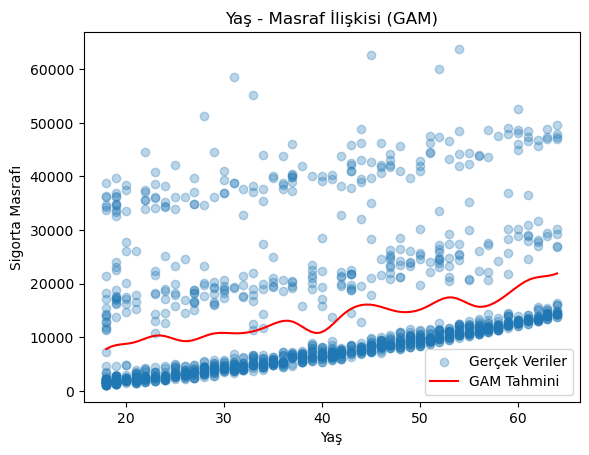

In [11]:
from pygam import LinearGAM, s
import numpy as np
import matplotlib.pyplot as plt

# Modeli eğitme
gam_age = LinearGAM(s(0)).fit(df["age"], df["charges"])

# Tahminleri alma
age_grid = np.linspace(df["age"].min(), df["age"].max(), 100)
age_pred = gam_age.predict(age_grid)

plt.scatter(df["age"], df["charges"], alpha=0.3, label="Gerçek Veriler")
plt.plot(age_grid, age_pred, color="red", label="GAM Tahmini")
plt.title("Yaş - Masraf İlişkisi (GAM)")
plt.xlabel("Yaş")
plt.ylabel("Sigorta Masrafı")
plt.legend()
plt.show()


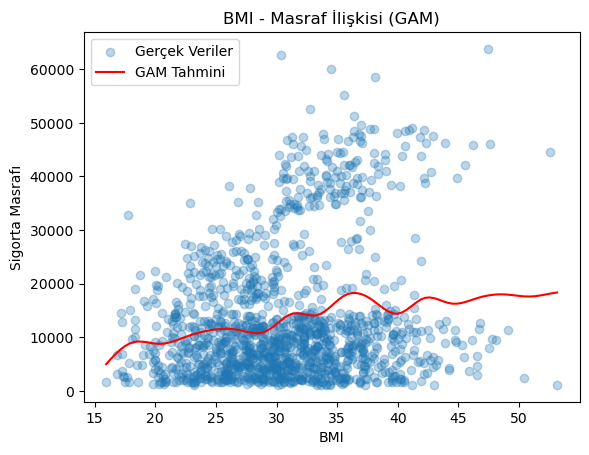

In [12]:
# Modeli eğitme
gam_bmi = LinearGAM(s(0)).fit(df["bmi"], df["charges"])

# Tahminleri alma
bmi_grid = np.linspace(df["bmi"].min(), df["bmi"].max(), 100)
bmi_pred = gam_bmi.predict(bmi_grid)

plt.scatter(df["bmi"], df["charges"], alpha=0.3, label="Gerçek Veriler")
plt.plot(bmi_grid, bmi_pred, color="red", label="GAM Tahmini")
plt.title("BMI - Masraf İlişkisi (GAM)")
plt.xlabel("BMI")
plt.ylabel("Sigorta Masrafı")
plt.legend()
plt.show()


Doğrusal olmayan bir ilişki var:
BMI arttıkça sigorta masrafında belirli dalgalanmalar gözleniyor.
Düşük BMI (15-25) aralığında masraflar nispeten düşük.
30 civarında bir yükseliş var, ardından 35-40 aralığında dalgalanma görülüyor.

Sigorta masraflarındaki büyük dağılım:
Aynı BMI seviyesinde çok farklı masraf değerleri var.
Bu durum BMI dışında başka değişkenlerin de masrafı etkilediğini gösteriyor (örneğin, sigara kullanımı, yaş, bölge gibi faktörler).

Yüksek BMI her zaman yüksek masraf demek değil:
BMI > 40 olduğunda tahmini masraf seviyesinde büyük bir artış gözlenmiyor.
Ancak bazı bireylerin çok yüksek masrafları var (örneğin, 50.000+ seviyeleri).